In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("e-shop clothing 2008.csv", delimiter=';')

##Label Encoding



In [ ]:
encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])
            encoders[col] = label_encoder
df["price 2"] = df["price 2"] - 1

## Variable Selection: Correlation Matrix




Text(0.5, 1.0, 'pearson correlation')

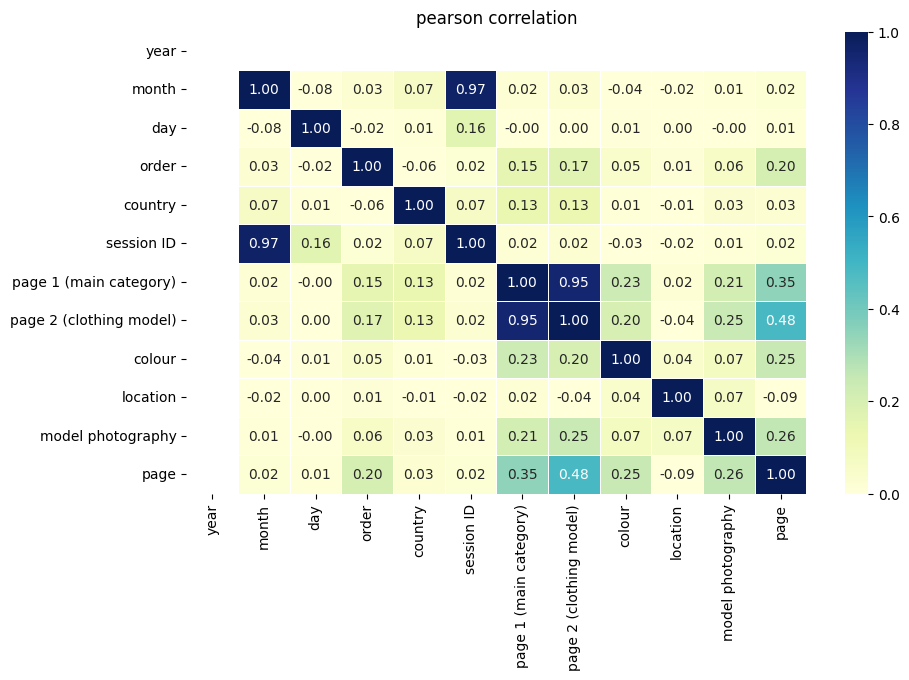

In [ ]:
df_copy2 = df.drop(['price','price 2'], axis=1)
df_copy2['year'] = pd.to_numeric(df_copy2['year'], errors='coerce')
plt.figure(figsize=(10,6))
corr_matrix = df_copy2.corr(method="pearson")
for col in corr_matrix.columns:
    if not pd.api.types.is_numeric_dtype(corr_matrix[col]):
        print(f"Warning: Column '{col}' in the correlation matrix is not numeric.")
sns.heatmap(corr_matrix, vmin=0, vmax=1, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

### Correlation matrix is used to understand how variables are related to each other and to identify patterns, dependencies, and potential associations between variables. This information is crucial for tasks such as feature selection, detecting multicollinearity, exploring data relationships, and making informed decisions in statistical analysis and predictive modeling.






### However, it's essential to remember that correlation does not imply causation. Just because two variables are correlated does not mean that one causes the other to change. Correlation analysis is just one tool in a data analyst's toolbox and should be used in conjunction with other methods for a comprehensive understanding of the data.

## Feature Engineering

In [ ]:
y = df["price"]
X = df.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)


In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

page 1 (main category)     0.494108
price 2                    0.442002
page 2 (clothing model)    0.327746
colour                     0.214587
location                   0.176459
page                       0.166039
model photography          0.065558
order                      0.007196
country                    0.007184
session ID                 0.002254
year                       0.001329
month                      0.000721
day                        0.000587
dtype: float64

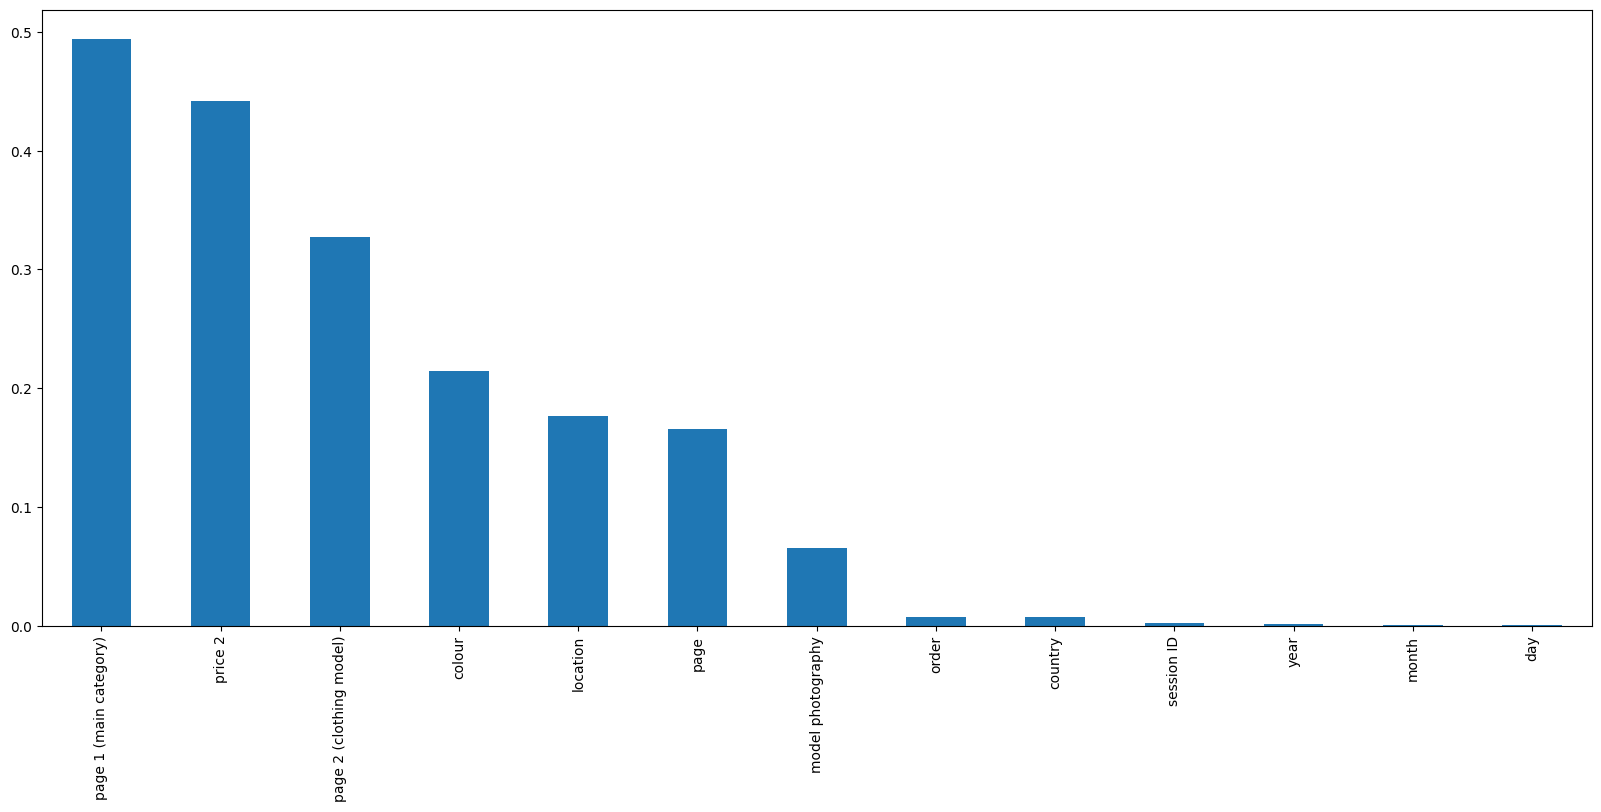

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8));

In [ ]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=6)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'price 2', 'page'],
      dtype='object')

Selected Features are page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'price 2', 'page

Model Selection using Random Forest

In [ ]:
col=['page 1 (main category)', 'page 2 (clothing model)', 'colour','location', 'price 2', 'page']
X_train=X_train[col]
X_test=X_test[col]

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

R2=[]
MAPE=[]
MAE=[]
RMSE=[]
acc=[]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score = rfr.score(X_test,y_test)
acc.append(rfr_score)
rfr_score

0.9999999971253558